In [4]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [8]:
torch.manual_seed(0)

# Dummy dataset
x = torch.randn(100, 2)
y = (x[:, 0] + x[:, 1] > 0).float().view(-1, 1)

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


x_train_tensor = x_train.float()
x_test_tensor  = x_test.float()

y_train_tensor = y_train.float().view(-1,1)
y_test_tensor  = y_test.float().view(-1,1)

In [15]:
class LogisticModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(2,1)
    self.sigmoid=nn.Sigmoid()

  def forward(self,x):
    out=self.linear(x)
    out=self.sigmoid(out)
    return out

In [16]:
loss_func = nn.BCELoss()

model = LogisticModel()



In [38]:
lr = 0.01
epochs = 2000
optimizer = torch.optim.SGD(model.parameters(),lr=lr)

train_losses=[]
test_losses=[]

for epoch in range(epochs):

  #  to prevent gradient accumilation
  optimizer.zero_grad()

  # training
  y_hat = model(x_train_tensor)

  #  calculating the loss
  loss = loss_func(y_hat,y_train_tensor)

  # calculating gradient for gradient descent
  loss.backward()

  # updating the parameters
  optimizer.step()

  print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")
  train_losses.append(loss.item())


  with torch.no_grad():
    y_test_hat = model(x_test_tensor)
    test_loss = loss_func(y_test_hat, y_test_tensor)
    print("Test Loss:", test_loss.item())
    test_losses.append(test_loss.item())


Epoch 1, Loss: 0.2821
Test Loss: 0.2840704321861267
Epoch 2, Loss: 0.2820
Test Loss: 0.2839876115322113
Epoch 3, Loss: 0.2819
Test Loss: 0.28390491008758545
Epoch 4, Loss: 0.2818
Test Loss: 0.28382235765457153
Epoch 5, Loss: 0.2817
Test Loss: 0.2837398648262024
Epoch 6, Loss: 0.2816
Test Loss: 0.2836574912071228
Epoch 7, Loss: 0.2815
Test Loss: 0.28357523679733276
Epoch 8, Loss: 0.2814
Test Loss: 0.28349313139915466
Epoch 9, Loss: 0.2813
Test Loss: 0.28341108560562134
Epoch 10, Loss: 0.2813
Test Loss: 0.28332915902137756
Epoch 11, Loss: 0.2812
Test Loss: 0.28324732184410095
Epoch 12, Loss: 0.2811
Test Loss: 0.2831656038761139
Epoch 13, Loss: 0.2810
Test Loss: 0.283083975315094
Epoch 14, Loss: 0.2809
Test Loss: 0.2830025255680084
Epoch 15, Loss: 0.2808
Test Loss: 0.28292110562324524
Epoch 16, Loss: 0.2807
Test Loss: 0.282839834690094
Epoch 17, Loss: 0.2806
Test Loss: 0.2827586531639099
Epoch 18, Loss: 0.2805
Test Loss: 0.2826775908470154
Epoch 19, Loss: 0.2804
Test Loss: 0.2825966179370

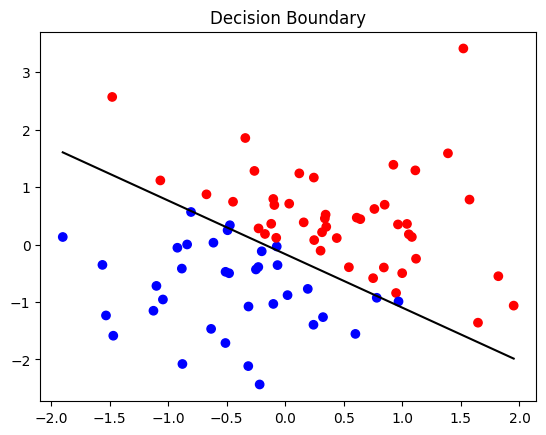

In [39]:
w = model.linear.weight.detach().numpy()
b = model.linear.bias.detach().numpy()

plt.scatter(
    x_train_tensor[:, 0],
    x_train_tensor[:, 1],
    c=y_train_tensor.squeeze(),
    cmap="bwr"
)

x_values = np.linspace(
    x_train_tensor[:, 0].min(),
    x_train_tensor[:, 0].max(),
    100
)

y_values = -(w[0][0] * x_values + b[0]) / w[0][1]

# Plot decision boundary
plt.plot(x_values, y_values, color='black')

plt.title("Decision Boundary")
plt.show()

Text(0.5, 1.0, 'Loss vs Epoch')

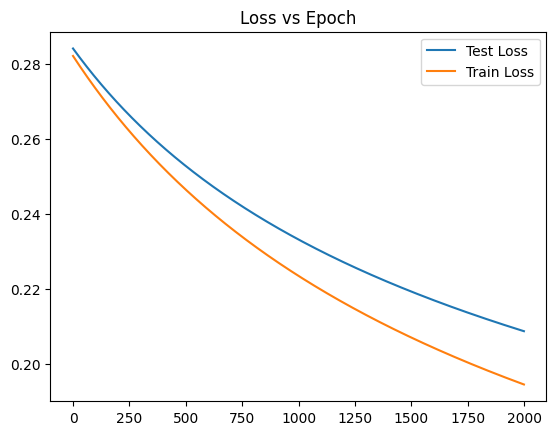

In [40]:
plt.plot(test_losses,label='Test Loss')
plt.plot(train_losses,label="Train Loss")
plt.legend()
plt.title("Loss vs Epoch")